In [86]:
import pandas as pd
import os
from pathlib import Path

In [87]:
selected_cat_features = ['job', 'marital', 'education', 'default', 'contact', 'month', 'day_of_week','poutcome']

In [88]:
selected_num_features = ['duration', 'nr.employed', 'euribor3m', 'emp.var.rate', 'previous']

In [89]:
data_path = Path("../data")
df = pd.read_csv("../data/bank-additional-full.csv", sep=";")

In [90]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

Numerical Features

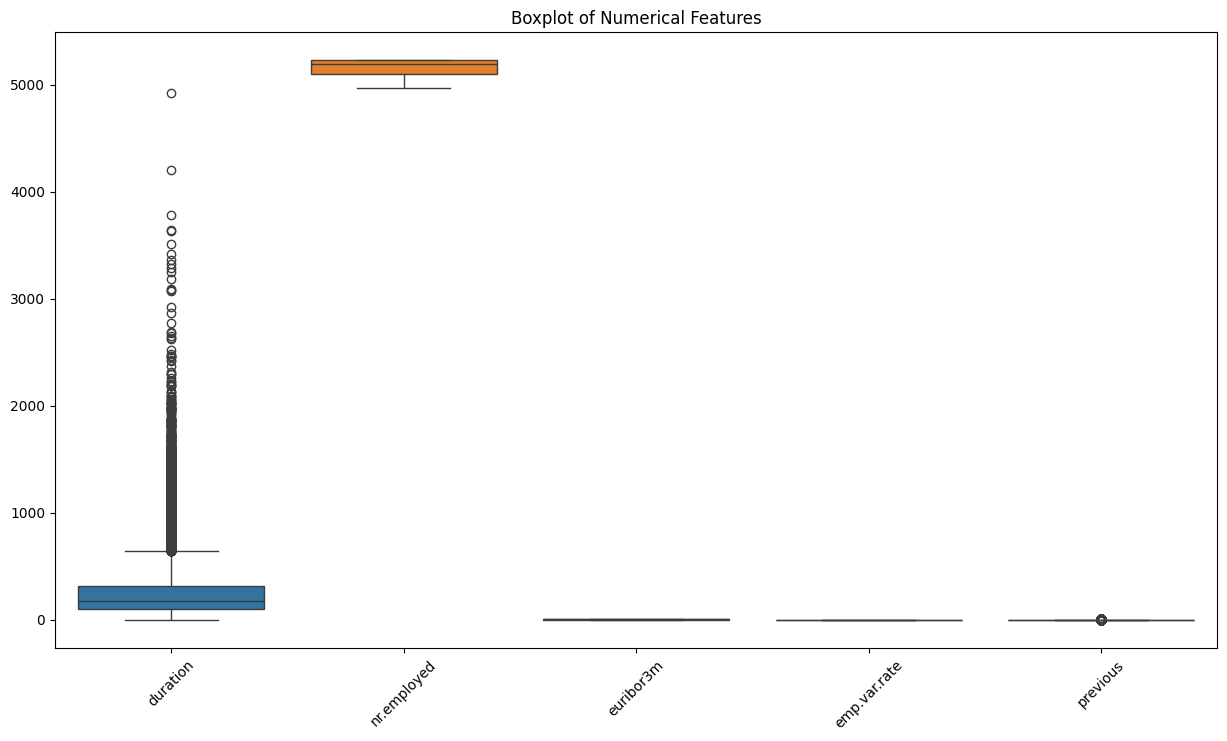

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = df[selected_num_features]

# Plot boxplots for all numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=numerical_df)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

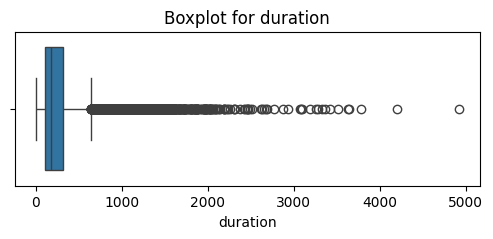

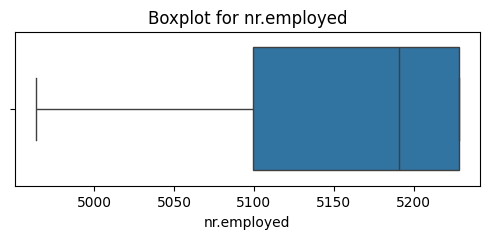

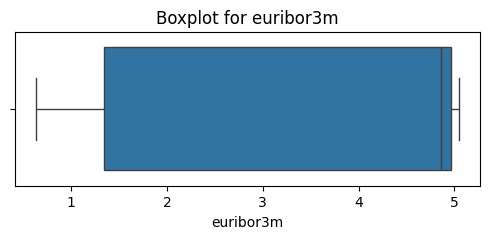

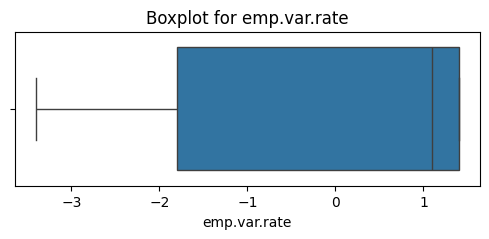

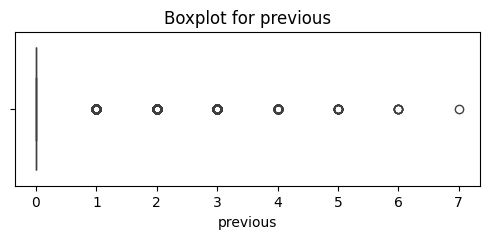

In [92]:
for col in numerical_df.columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [93]:
for col in numerical_df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'{col}: {len(outliers)} outliers')

duration: 2963 outliers
nr.employed: 0 outliers
euribor3m: 0 outliers
emp.var.rate: 0 outliers
previous: 5625 outliers


*log transformations for outliers*

In [94]:
import numpy as np

df['duration_log'] = np.log1p(df['duration'])
df['previous_log'] = np.log1p(df['previous'])

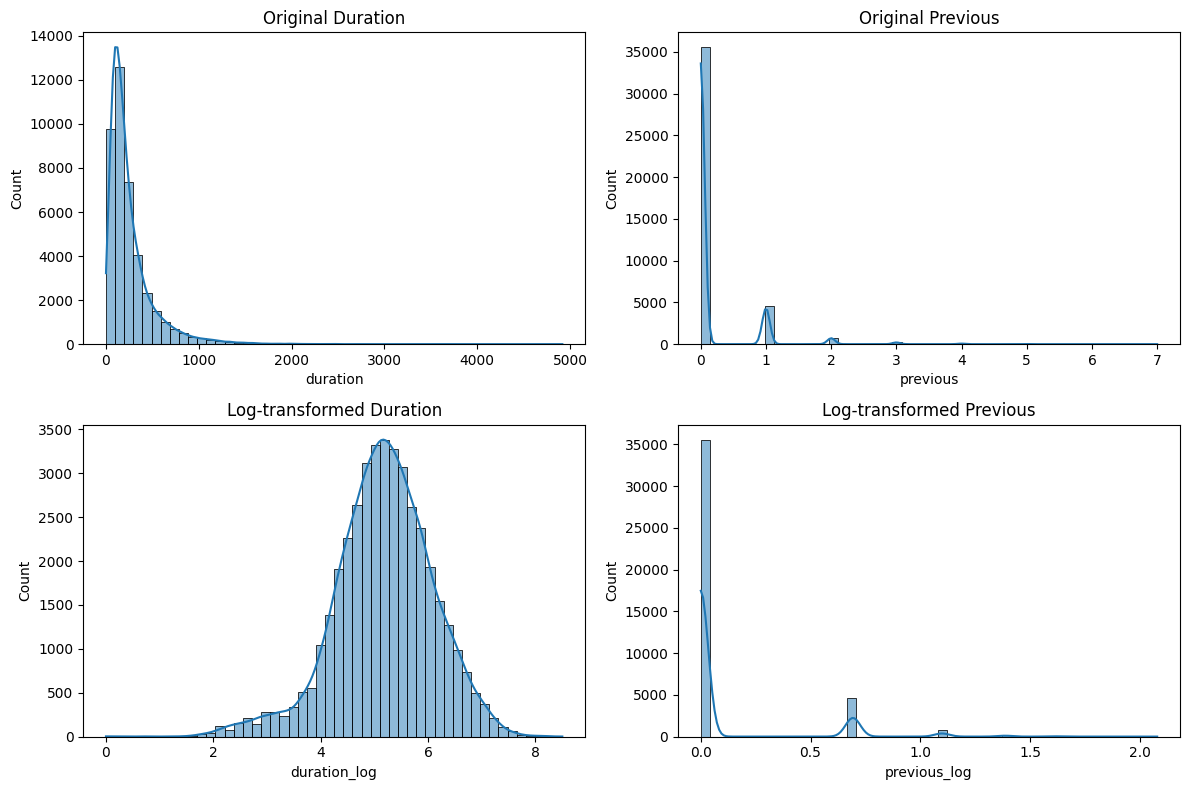

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original 'duration' and 'previous'
sns.histplot(df['duration'], bins=50, ax=axes[0, 0], kde=True)
axes[0, 0].set_title("Original Duration")

sns.histplot(df['previous'], bins=50, ax=axes[0, 1], kde=True)
axes[0, 1].set_title("Original Previous")

# Log-transformed
sns.histplot(df['duration_log'], bins=50, ax=axes[1, 0], kde=True)
axes[1, 0].set_title("Log-transformed Duration")

sns.histplot(df['previous_log'], bins=50, ax=axes[1, 1], kde=True)
axes[1, 1].set_title("Log-transformed Previous")

plt.tight_layout()
plt.show()


In [96]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'duration_log',
       'previous_log'],
      dtype='object')

In [97]:
new_selected_num_features = ['duration_log', 'previous_log', 'nr.employed', 'euribor3m', 'emp.var.rate']

Categorical Features

In [98]:
for col in selected_cat_features:
    print(f"{col}: {df[col].nunique()} unique values")

job: 12 unique values
marital: 4 unique values
education: 8 unique values
default: 3 unique values
contact: 2 unique values
month: 10 unique values
day_of_week: 5 unique values
poutcome: 3 unique values


In [99]:
from sklearn.preprocessing import OneHotEncoder
df_encoded = pd.get_dummies(df[selected_cat_features], drop_first=True)
df_encoded = df_encoded.astype(int)

In [100]:
df_encoded.columns.value_counts().sum()

np.int64(39)

In [101]:
df_encoded

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41184,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41185,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_scaled = pd.DataFrame(scaler.fit_transform(df[selected_num_features]), columns=selected_num_features, index=df.index)


In [103]:
numerical_scaled

,duration,nr.employed,euribor3m,emp.var.rate,previous
0,0.010471,0.331680,0.712460,0.648092,-0.349494
1,-0.421501,0.331680,0.712460,0.648092,-0.349494
2,-0.124520,0.331680,0.712460,0.648092,-0.349494
3,-0.413787,0.331680,0.712460,0.648092,-0.349494
4,0.187888,0.331680,0.712460,0.648092,-0.349494
...,...,...,...,...,...
41183,0.292025,-2.815697,-1.495186,-0.752343,-0.349494
41184,0.481012,-2.815697,-1.495186,-0.752343,-0.349494
41185,-0.267225,-2.815697,-1.495186,-0.752343,-0.349494
41186,0.708569,-2.815697,-1.495186,-0.752343,-0.349494


In [104]:
df["y"] = df['y'].map({"no": 0, "yes": 1})

In [105]:
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [107]:
final_df = pd.concat([numerical_scaled, df_encoded, df["y"]], axis=1)

In [108]:
final_df

,duration,nr.employed,euribor3m,emp.var.rate,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
0,0.010471,0.331680,0.712460,0.648092,-0.349494,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,-0.421501,0.331680,0.712460,0.648092,-0.349494,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,-0.124520,0.331680,0.712460,0.648092,-0.349494,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,-0.413787,0.331680,0.712460,0.648092,-0.349494,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0.187888,0.331680,0.712460,0.648092,-0.349494,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.292025,-2.815697,-1.495186,-0.752343,-0.349494,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
41184,0.481012,-2.815697,-1.495186,-0.752343,-0.349494,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
41185,-0.267225,-2.815697,-1.495186,-0.752343,-0.349494,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
41186,0.708569,-2.815697,-1.495186,-0.752343,-0.349494,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [112]:
final_df.to_csv('final_data.csv', index=False)